# Literature, innit? 🇬🇧🇬🇧🔥🔥🔥🗣️🗣️🗣️🇬🇧🇬🇧🔊🔊🔊

- [И. П. Костенко, Выравнивание статистических рядов. Проверка правдоподобия
гипотез, Матем. обр., 2008, выпуск 2, 50–71](https://www.mathnet.ru/links/7ff4e9240bd69389f655a231338fdf4f/mo80.pdf) – материал, который давался на лабе, очень похож на эти слайды
- [Выравнивание статистических рядов](https://studfile.net/preview/3208238/page:4/)
- [Норм видос по Пирсону](https://www.youtube.com/watch?v=hvBHyDm4biM)

# Prepare notebook for running

## Install and import required packages, set plotting theme

In [1]:
import sys

In [2]:
!{sys.executable} -m pip install -r "../requirements.txt"

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.23.2/lib/python3.12/site-packages/gpg-1.23.2-py3.12-macosx-14-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached ipython-8.23.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
  Using cached matplotlib_inline-0.1.7-py3-none-any.whl.metadata (3.9 kB)
  Using cached parso-0.8.4-py2.py3-none-any.whl.metadata (7.7 kB)
  Using cached traitlets-5.14.2-py3-none-any.whl.metadata (10 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl.metadata (1.6 kB)
Using cached comm-0.2.2-py3-none-any.whl (7.2 kB)
Using cached ipython-8.23.0-py3-none-any.whl (814 kB)
Using cached ipywidgets-

In [33]:
import os
from typing import Callable
from IPython.display import display

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_theme()
np.random.seed(42)

## Set up constants and preprocess dataset files

In [723]:
MAKE_PANDAS_LIKE_FILES: bool = False  # Set to True/False if your .csv files aren't/are pandas-friendly
# Change location if needed
ORIGINAL_FILE_PATHS: list[str] = ['../data/set_1.csv', '../data/set_2.csv', '../data/set_3.csv']
PANDAS_FILE_PATHS: list[str] = list(map(
    lambda path: os.path.join(os.getcwd(), path), 
    ['data/set_1.csv', 'data/set_2.csv', 'data/set_3.csv']
))
VALUE_COL: str = "value"
ALPHA: str = "0.05"
K_S_COEF: float = 1.3581
CHI_SQUARED_CRITICAL_VALUE: float = 67.505

In [724]:
if MAKE_PANDAS_LIKE_FILES:
    for of, pf in zip(ORIGINAL_FILE_PATHS, PANDAS_FILE_PATHS):
        with open(of, 'r') as f:
            df = pd.DataFrame(list(map(float, f.read().split(','))))
        df.to_csv(pf, index=False)

## Obtain Kolmogorov-Smirnov test table
Here, row with ``n`` = 51 means that values greater than 50 should be computed by dividing corresponding table cell by ``n``, for instance: $h = \frac{1.3581}{\sqrt{n}}$.

In [725]:
ks_table = pd.read_csv("./ks_table.csv", sep=";", dtype=float)
ks_table

,n,0.001,0.01,0.02,0.05,0.1,0.15,0.2
0,1.0,NaN,0.99500,0.99000,0.97500,0.95000,0.92500,0.90000
1,2.0,0.97764,0.92930,0.90000,0.84189,0.77639,0.72614,0.68377
2,3.0,0.92063,0.82900,0.78456,0.70760,0.63604,0.59582,0.56481
3,4.0,0.85046,0.73421,0.68887,0.62394,0.56522,0.52476,0.49265
4,5.0,0.78137,0.66855,0.62718,0.56327,0.50945,0.47439,0.44697
5,6.0,0.72479,0.61660,0.57741,0.51926,0.46799,0.43526,0.41035
6,7.0,0.67930,0.57580,0.53844,0.48343,0.43607,0.40497,0.38145
7,8.0,0.64098,0.54180,0.50654,0.45427,0.40962,0.38062,0.35828
8,9.0,0.60846,0.51330,0.47960,0.43001,0.38746,0.36006,0.33907
9,10.0,0.58042,0.48895,0.45662,0.40925,0.36866,0.34250,0.32257


# Begin the assignment

## Read and clean the data

In [726]:
df1, df2, df3 = map(lambda s: pd.read_csv(s, names=[VALUE_COL], dtype=float), PANDAS_FILE_PATHS)

### Make initial observations and simple plots

In [727]:
display(df1.describe(), df2.describe(), df3.describe())

,value
count,100001.000000
mean,3.440746
std,3.169907
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,66.000000


,value
count,10001.000000
mean,16.241659
std,104.534353
min,-1071.786686
25%,-39.330262
50%,18.857762
75%,77.012704
max,698.777979


,value
count,100001.000000
mean,0.124487
std,0.160142
min,-1.989815
25%,0.035304
50%,0.086259
75%,0.173373
max,2.433138


In [728]:
def plot_datasets(suptitle: str) -> None:
    """Plots histograms for three initial datasets"""
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(nrows=2, ncols=2)
    
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 1])
    ax3 = fig.add_subplot(gs[:, 0])
    
    plt.suptitle(suptitle, fontsize=24)
    
    for i, (ax, df) in enumerate(zip([ax1, ax2, ax3], [df1, df2, df3])):    
        sns.histplot(df, legend=False, bins=70, stat='probability', ax=ax)
        ax.set_xlabel('Value', fontdict={'fontsize': 12})
        ax.set_ylabel('Probability', fontdict={'fontsize': 12})
        ax.set_title(f'Historgam for dataset #{i + 1}', fontdict={'fontsize': 16})
    
    plt.tight_layout(pad=2.16)
    plt.show()

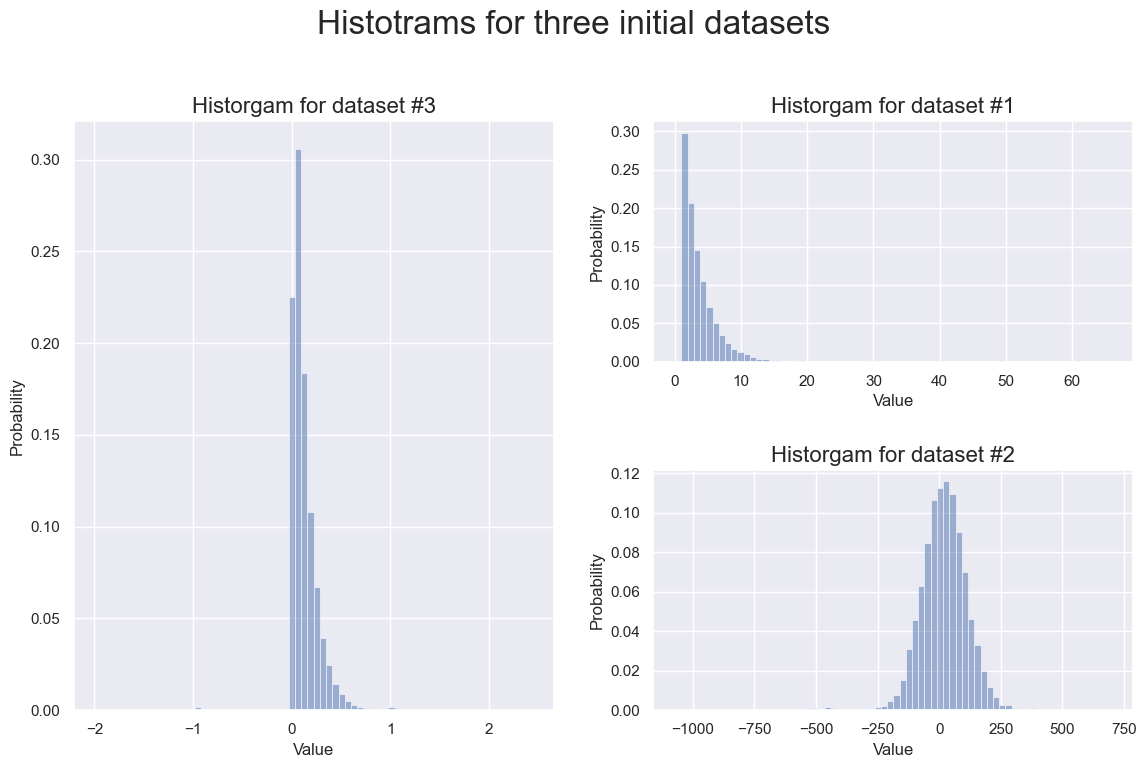

In [729]:
plot_datasets('Histotrams for three initial datasets')

### Remove outliers

In [730]:
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    q: float = df[VALUE_COL].quantile(0.99)
    return df[df[VALUE_COL] < q]

In [731]:
df1, df2, df3 = map(remove_outliers, [df1, df2, df3])

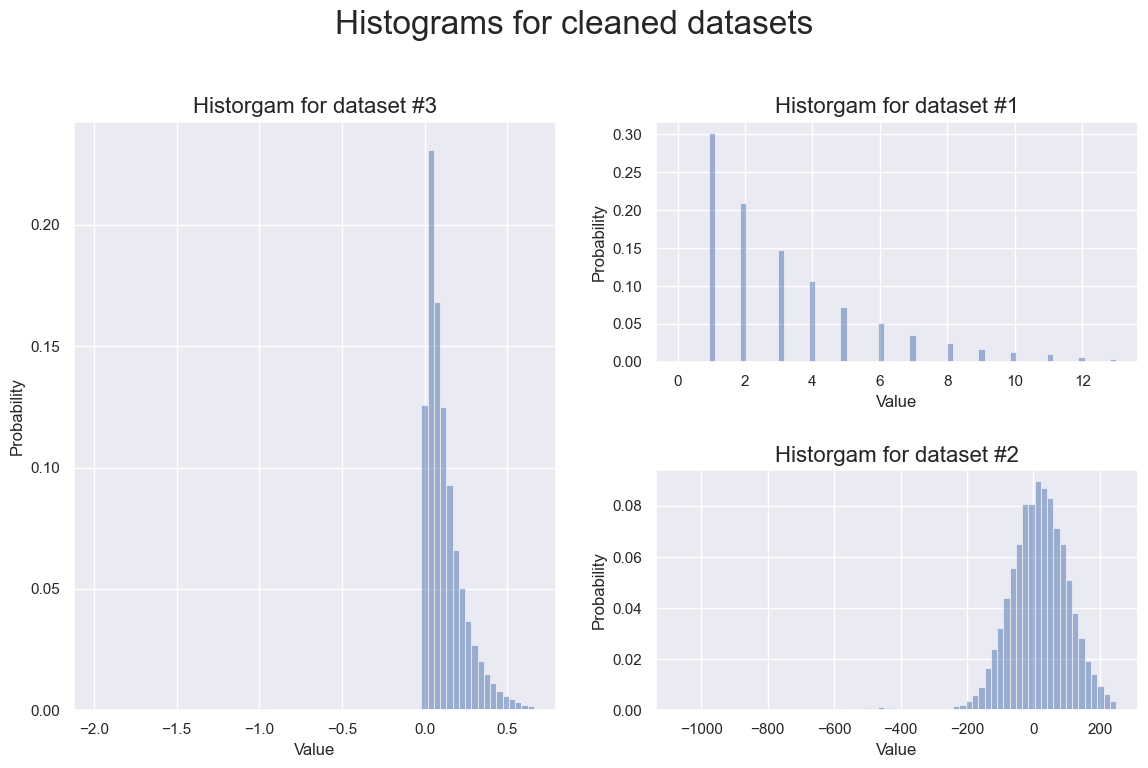

In [732]:
plot_datasets('Histograms for cleaned datasets')

As it can be seen from the shape of the three histograms above, the first dataset can be fit into **geometric** distribution (discrete option), the third dataset can be fit into the same distribution as the first one, while the second one can be fit into **binomial** or **Poisson** distribution.

# Match datasets with corresponding distributions

## Define functions for generating random distributions

### Geometric

In [733]:
def geometric(p: float, size: int) -> np.ndarray:
    assert 0 <= p <= 1, "Probability cannot be less than zero or greater than one!"
    return np.random.geometric(p, size)

### Binomial

In [734]:
def binomial(n: int, p: float, size: int) -> np.ndarray:
    assert 0 <= p <= 1, "Probability cannot be less than zero or greater than one!"
    return np.random.binomial(n, p, size)

### Poisson
If we say $Y \sim \operatorname{P}(\lambda)$, then: 
$$
p(k) \equiv P(Y = k) = \frac{\lambda^k}{k!} e^{-\lambda},
$$
where $k$ is the number of events, $\lambda$ = $\mu_Y$.

In [735]:
def poisson(lam: float, size: int) -> np.ndarray:
    return np.random.poisson(lam, size)

### Uniform

In [736]:
def uniform(low: float, high: float, size: int) -> np.ndarray:
    return np.random.uniform(low, high, size)

### Normal

In [737]:
def normal(mean: float, std: float, size: int) -> np.ndarray:
    return np.random.normal(mean, std, size)

### Exponential

In [738]:
def exponential(scale: float, size: int) -> np.ndarray:
    return np.random.exponential(scale, size)

## Define criterions and utility functions

### CDF computation
Cumulative distribution function (CDF) is a function that represents the probability that random variable ${X}$ will take value less or equal than $x$:

$$
F_{X}\left(x\right) = \operatorname {P}(X \leq x)
$$

In [875]:
def cdf(data: np.ndarray) -> np.ndarray:
    """Takes data distribution and computes its cumulative distribution function (CDF)."""
    x, counts = np.unique(data, return_counts=True)
    cdf = np.cumsum(counts)
    return cdf / cdf[-1]

### Chi-squared test
Links with information about $\chi^2$ test are provided at the beginning of the document.

In [877]:
def chi_squared_test(data: np.ndarray, th_data: np.ndarray) -> float:
    """Computes chi-squared test of two distributions."""
    n_bins: int = 51
    delta: float = 75e-4

    emp_hist, _ = np.histogram(data, bins=n_bins, density=True)
    th_hist, _ = np.histogram(th_data, bins=n_bins, density=True)
    
    chi_squared: float = np.sum((th_hist - emp_hist) ** 2 / (emp_hist + delta))
    
    return np.around(chi_squared, 9)

### Kolmogorov-Smirnov test
- [Dummy Python implementation of K-S test using Pandas & NumPy](https://medium.com/@ricardojaviermartnezsustegui/kolmog%C3%B3rov-smirnov-test-in-python-step-by-step-1b7532021bd2)

In [827]:
def ks_test(data: np.ndarray, th_data: np.ndarray) -> float:
    """Computes Kolmogorov-Smirnos test of two distributions."""
    data_bins: int = len(np.unique(data))
    th_data_bins: int = len(np.unique(th_data))
    n_bins: int = min(data_bins, th_data_bins)
    
    emp_cdf: np.ndarray = cdf(data)
    th_cdf: np.ndarray = cdf(th_data)
    
    D = np.max(np.abs(emp_cdf[:n_bins] - th_cdf[:n_bins]))
    h = (ks_table[ks_table['n'] == n_bins][ALPHA].iloc[0] 
         if n_bins in list(ks_table['n'].astype(int)) and n_bins < 51
         else K_S_COEF / np.sqrt(n_bins))

    return np.around(D, 9), np.around(h, 9)

## Create distribution testing pipeline
This class is responsible for testing fits of all the distributions defined above. Its main method is `find_best_fit` which finds the best fitting distribution amongst those in `self.distributions` field. 

This field is essentially a dictionary with distribution names as keys and some specific tuples as values. These tuples' first elements are function objects for data generation, and second elements are preprocessing function that take $\mu$ and $\sigma$ as inputs and output arguments for those function objects.

In [890]:
class DistributionTestingPipeline:
    def __init__(self):
        self.distributions = {
            'geometric': (geometric, lambda mean, std: (1. / mean,)),
            'binomial': (binomial, lambda mean, std: (1. / (mean - std ** 2), 1. - std ** 2 / mean)),
            'poisson': (poisson, lambda mean, std: (mean,)),
            'uniform': (uniform, lambda mean, std: (mean - np.sqrt(2) * std, mean + np.sqrt(2) * std)),
            'normal': (normal, lambda mean, std: (mean, std)),
            'exponential': (exponential, lambda mean, std: (1. / mean,))
        }

    def find_best_fit(self, data: pd.DataFrame) -> pd.DataFrame:
        """Given the dataset, finds the best fitting theoretical distribution
        based on the specified criteria. Theoretical distributions are taken from
        `distributions` field of class instance.
        """
        estimations: dict[str, np.ndarray] = {}

        for name, (dist, preproc) in self.distributions.items():
            try:
                estimations[name] = self.test_distibution(data, name)
            except AssertionError as e:
                print(f"""Skipping {name} distribution due to following error: "{e}".\n""")
        
        return pd.DataFrame.from_dict(estimations, orient='index')
    
    def test_distibution(self, data: pd.DataFrame, name: str):
        """Test how well a single distribution with name ``name`` fits the data."""
        assert name in self.distributions.keys(), f"Distribution should be either of: {', '.join(self.distributions.keys())}"
        
        mean, std = data[VALUE_COL].mean(), data[VALUE_COL].std()
        th_data: np.ndarray = self.generate_distribution(name, mean, std, len(data[VALUE_COL]))

        # print(f"Processing {name} distribution:")
        # print(f" - Epirical mean = {np.around(mean, 2)}, empirical std = {np.around(std, 2)}")
        # print(f" - Theoretical mean = {np.around(th_data.mean(), 2)}, theoretical std = {np.around(th_data.std(), 2)}")
        # print()
        
        D, h = ks_test(data[VALUE_COL].to_numpy(), np.insert(th_data, [0], 0))
        chi_stat  = chi_squared_test(data[VALUE_COL].to_numpy(), th_data)

        return {"ks_D": D, 
                "ks_h": h,
                "ks_fit": D < h, 
                "chi_stat": chi_stat, 
                "chi_fit": chi_stat < CHI_SQUARED_CRITICAL_VALUE}
    
    def generate_distribution(self, name: str, mean: float, std: float, size: int) -> np.ndarray:
        """Generates theoretical distribution with values corresponding to function arguments."""
        dist, preproc = self.distributions.get(name)
        params: tuple = preproc(mean, std)
        
        return dist(*params, size)

# Find best-fitting theoretical distributions to the given empritical data

In [891]:
pipeline = DistributionTestingPipeline()

In [892]:
df1_results = pipeline.find_best_fit(df1)
df2_results = pipeline.find_best_fit(df2)
df3_results = pipeline.find_best_fit(df3)

Skipping binomial distribution due to following error: "Probability cannot be less than zero or greater than one!".

Skipping binomial distribution due to following error: "Probability cannot be less than zero or greater than one!".

Skipping geometric distribution due to following error: "Probability cannot be less than zero or greater than one!".



## Observing results

In [893]:
stats: dict[str, tuple[float, float]] = {
    "df1": (df1[VALUE_COL].mean(), df1[VALUE_COL].std(), len(df1)),
    "df2": (df2[VALUE_COL].mean(), df2[VALUE_COL].std(), len(df2)),
    "df3": (df3[VALUE_COL].mean(), df3[VALUE_COL].std(), len(df3))
}

In [895]:
stats

{'df1': (3.232142314433042, 2.4984474134775665, 98711),
 'df2': (13.123781592525255, 100.071916214365, 9900),
 'df3': (0.11605528426262628, 0.13532427395338473, 99000)}

### Dataset №1
As it can be seen from results for dataset №1, $D < h$ in K-S test for **geometric** and **Peometric** distributions, but in case of **geometric** distribution D-value is smallest, so it is the best fit for dataset №1.

$\chi^2$ test produced plausible results as well.

In [896]:
display(df1_results)

,ks_D,ks_h,ks_fit,chi_stat,chi_fit
geometric,0.013418,0.3489,True,54.075492,True
poisson,0.137111,0.3489,True,4.176238,True
uniform,0.999858,0.3489,False,104.898549,False
normal,0.999858,0.3489,False,26.681868,True
exponential,0.999858,0.3489,False,2558.272916,False


<Axes: ylabel='Probability'>

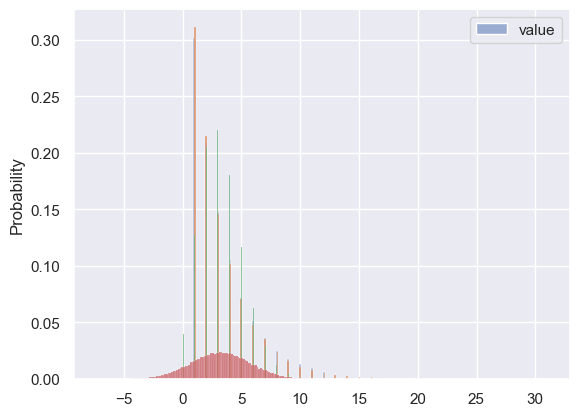

In [897]:
sns.histplot(df1, stat="probability")
sns.histplot(pipeline.generate_distribution("geometric", *stats["df1"]), stat="probability")
sns.histplot(pipeline.generate_distribution("poisson", *stats["df1"]), stat="probability")
sns.histplot(pipeline.generate_distribution("normal", *stats["df1"]), stat="probability")

### Dataset №2
As it can be seen from results for dataset №2, $D < h$ in K-S test for **uniform**, **normal**, and **exponential** distributions, but in case of **normal** distribution, D-value is smallest, so it is the best fit for dataset №2.

$\chi^2$ test produced plausible results as well.

In [898]:
display(df2_results)

,ks_D,ks_h,ks_fit,chi_stat,chi_fit
geometric,0.990909,0.143156,False,2.740668,True
poisson,0.997071,0.252193,False,36.509696,True
uniform,0.000101,0.013649,True,0.065401,True
normal,0.000101,0.013649,True,0.032718,True
exponential,0.000101,0.013649,True,60970.866000,False


<Axes: ylabel='Probability'>

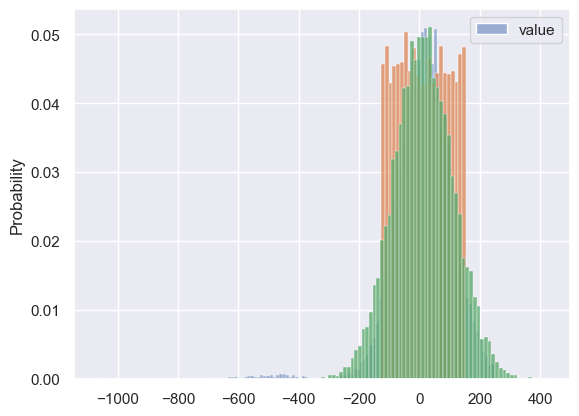

In [862]:
sns.histplot(df2, stat="probability")
sns.histplot(pipeline.generate_distribution("uniform", *stats["df2"]), stat="probability")
sns.histplot(pipeline.generate_distribution("normal", *stats["df2"]), stat="probability")

### Dataset №3
What the fuck

In [899]:
display(df3_results)

,ks_D,ks_h,ks_fit,chi_stat,chi_fit
binomial,0.999899,0.409250,False,160.098262,False
poisson,0.999960,0.623940,False,28853.502527,False
uniform,0.169443,0.004736,False,30630.173782,False
normal,0.169443,0.004736,False,9007.780512,False
exponential,0.169443,0.004736,False,22.898240,True


<Axes: ylabel='Probability'>

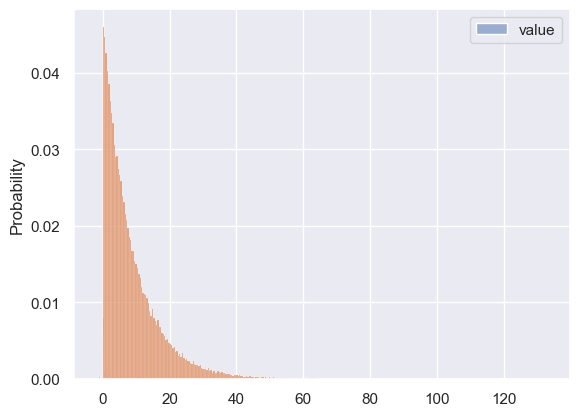

In [900]:
sns.histplot(df3, stat="probability")
sns.histplot(pipeline.generate_distribution("exponential", *stats["df3"]), stat="probability")